# Supervised Learning Regression Project: Cars4U

## Problem Statement

### Business Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it. 


### Objective

To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.


### Data Description

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below. 

**Data Dictionary** 

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner_Type: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000 INR)
- Price: The price of the used car in INR Lakhs

## Importing necessary libraries

In [470]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [471]:
data = pd.read_csv('used_cars_data.csv')

## Data Overview

- Observations
- Sanity checks

In [472]:
data.head() 

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  
0  58.16 bhp    5.0       5.51   1.75  
1  126.2 bhp    5.0      16.06  12.50  
2   88.7 bhp    5.0       8.61   4.50  
3  88.76 bhp    7.0      11.27   6.00  
4  140.8 bhp    5.0      53.14  17.74

In [473]:
data.shape # To know no.of rows and columns in the dataset
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns")

There are 7253 rows and 14 columns


In [474]:
data.info() # To check datatypes of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


Observations

There are 3 variables of type int64, 3 variables of float64 type and 8 object types.

Mileage, Engine and Power columns have units along with numeric values. We need to separate numeric values and units into separate columns

In [475]:
data.describe().T # Statistical summary of data

count          mean           std      min       25%  \
S.No.              7253.0   3626.000000   2093.905084     0.00   1813.00   
Year               7253.0   2013.365366      3.254421  1996.00   2011.00   
Kilometers_Driven  7253.0  58699.063146  84427.720583   171.00  34000.00   
Seats              7200.0      5.279722      0.811660     0.00      5.00   
New_Price          7253.0     21.307322     24.256314     3.91      7.88   
Price              6019.0      9.479468     11.187917     0.44      3.50   

                        50%       75%        max  
S.No.               3626.00   5439.00     7252.0  
Year                2014.00   2016.00     2019.0  
Kilometers_Driven  53416.00  73000.00  6500000.0  
Seats                  5.00      5.00       10.0  
New_Price             11.30     21.69      375.0  
Price                  5.64      9.95      160.0

Observations

- Kilometers_Driven has a range of 171 to 6500000 with 75th percentile value 73000 which indicates outlier on higher end. The standard deviation is 84427 which is very high.

- Seats ranges from 0 to 10 which is abnormal on lower side as cars will not have 0 seats.

In [476]:
data.isnull().sum() # To check for null values

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

Observations:

There are 6 variables with null values. 

In [477]:
data.duplicated().sum() # To check for dupliates

0

There are no duplicates

#### Data Preprocessing

Manipulation of numeric, categorical and text data

Mileage, Engine and Power columns have units along with numeric values. We need to separate numeric values and units into separate columns

In [478]:
df = data.copy() 

##### Mileage

Mileage column has km/kg and kmpl units along with numeric data. We can create two separate columns to have numeric data and unit data

In [479]:
df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

0      1
0   26.6  km/kg
1  19.67   kmpl
2   18.2   kmpl
3  20.77   kmpl
4   15.2   kmpl

In [480]:
df_mileage[1].value_counts() # To check unique units

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [481]:
df["Mileage_Num"] = df_mileage[0].astype(float) 
df["Mileage_Unit"] = df_mileage[1]

In [482]:
df.head() # We can Check if new columns are created

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  Mileage_Num Mileage_Unit  
0  58.16 bhp    5.0       5.51   1.75        26.60        km/kg  
1  126.2 bhp    5.0      16.06  12.50        19.67         kmpl  
2   88.7 bhp    5.0       8.61   4.50        18.20         kmpl  
3  88.76 bhp    7.0      11.27   6.00        20.77         kmpl  
4  140.8 bhp    5.0      53.14  17.74        15.20         kmpl

In [483]:
# To group Fuel type and mileage unit 
df.groupby(by=["Fuel_Type", "Mileage_Unit"]).size()

Fuel_Type  Mileage_Unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

##### Engine

Engine column has units CC along with numeric data. We can split the data to have numeric values in separate column

In [484]:
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

0   1
0   998  CC
1  1582  CC
2  1199  CC
3  1248  CC
4  1968  CC

In [485]:
df_engine[1].value_counts() # check unique units

CC    7207
Name: 1, dtype: int64

In [486]:
df["Engine_Num"] = df_engine[0].astype(float) 

df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  Mileage_Num Mileage_Unit  Engine_Num  
0  58.16 bhp    5.0       5.51   1.75        26.60        km/kg       998.0  
1  126.2 bhp    5.0      16.06  12.50        19.67         kmpl      1582.0  
2   88.7 bhp    5.0       8.61   4.50        18.20         kmpl      1199.0  
3  88.76 bhp    7.0      11.27   6.00        20.77         kmpl      1248.0  
4  140.8 bhp    5.0      53.14  17.74        15.20         kmpl      1968.0

##### Power

Power column has units bhp along with numeric data. We can extract numeric data and save it to a new column

In [487]:
df_power = df["Power"].str.split(" ", expand=True)
df_power.head()

0    1
0  58.16  bhp
1  126.2  bhp
2   88.7  bhp
3  88.76  bhp
4  140.8  bhp

In [488]:
df_power[1].value_counts()

bhp    7078
Name: 1, dtype: int64

In [489]:
df["Power_Num"] = df_power[0].astype(float)  

df.head()

S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine  \
0              72000       CNG       Manual      First  26.6 km/kg   998 CC   
1              41000    Diesel       Manual      First  19.67 kmpl  1582 CC   
2              46000    Petrol       Manual      First   18.2 kmpl  1199 CC   
3              87000    Diesel       Manual      First  20.77 kmpl  1248 CC   
4              40670    Diesel    Automatic     Second   15.2 kmpl  1968 CC   

       Power  Seats  New_Price  Price  Mileage_Num Mileage_Unit  Engine_Num  \
0  58.16 bhp    5.0       5.51   1.75        26.60        km/kg       998.0   
1  126.2 bhp    5.0      16.06  12.50        19.67         kmpl      1582.0   
2   88.7 bhp    5.0       8.61   4.50        18.20         kmpl      1199.0   
3  88.76 bhp    7.0      11.27   6.00        20.77         kmpl      1248.0   
4  140.8 bhp    5.0      53.14  17.74        15.20         kmpl      1968.0   

   Power_Num  
0      58.16  
1     126.20  
2      88.70  
3      88.76  
4     140.80

S.No column is not of much use, we can drop that column. We can also delete Mileage, Engine and Power columns as we have created new columns for them to store numeric data

In [490]:
df.drop(['S.No.','Mileage', 'Engine', 'Power'], axis=1, inplace=True) # Drop columns
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Seats  New_Price  Price  Mileage_Num  \
0       CNG       Manual      First    5.0       5.51   1.75        26.60   
1    Diesel       Manual      First    5.0      16.06  12.50        19.67   
2    Petrol       Manual      First    5.0       8.61   4.50        18.20   
3    Diesel       Manual      First    7.0      11.27   6.00        20.77   
4    Diesel    Automatic     Second    5.0      53.14  17.74        15.20   

  Mileage_Unit  Engine_Num  Power_Num  
0        km/kg       998.0      58.16  
1         kmpl      1582.0     126.20  
2         kmpl      1199.0      88.70  
3         kmpl      1248.0      88.76  
4         kmpl      1968.0     140.80

In [491]:
# looking at value counts for non-numeric features

num_to_display = 10  # max no.of values to display

for colname in df.dtypes[df.dtypes == "object"].index:
    val_counts = df[colname].value_counts(dropna=False)  # will also show the NA counts
    print(val_counts[:num_to_display])

    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50, "\n")  # For separation between value_counts for different features

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda Amaze S i-Dtech         32
Hyundai Grand i10 Sportz      32
Honda City 1.5 V MT           32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.
-------------------------------------------------- 

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.
-------------------------------------------------- 

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
-------------------------------------------------- 

Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
-------------

Observations

- Mumbai has the highest no.of used car sales which is 790

- Diesel cars have highest sales which is 3205

- Manual transmission type cars have highest sales which is 4299

- Cars of first owner type have highest sales which is 4929

- Cars with mileage unit kmpl have highest sales which is 5951

- Cars of brand Maruti have highest sales which is 1211 and model swift has 353 sales which is relatively highest than other models

#### Missing Value Detection Treatment

In [492]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1234
Mileage_Num             2
Mileage_Unit            2
Engine_Num             46
Power_Num             175
dtype: int64

We have null values for Seats, Price, Mileage_Num, Mileage_Unit, Engine_Num and Power_Num columns.

Price is a dependent variable, so we can't impute missing values. We have to delete those rows

In [493]:
df.dropna(subset=["Price"], inplace=True) # To drop missing values in Price column

In [494]:
df[df["Seats"].isnull()] # To check null values in Seats column

Name    Location  Year  \
194                             Honda City 1.5 GXI   Ahmedabad  2007   
208                           Maruti Swift 1.3 VXi     Kolkata  2010   
229                               Ford Figo Diesel   Bangalore  2015   
733                           Maruti Swift 1.3 VXi     Chennai  2006   
749                   Land Rover Range Rover 3.0 D      Mumbai  2008   
1294                             Honda City 1.3 DX       Delhi  2009   
1327                          Maruti Swift 1.3 ZXI   Hyderabad  2015   
1385                            Honda City 1.5 GXI        Pune  2004   
1460  Land Rover Range Rover Sport 2005 2012 Sport  Coimbatore  2008   
1917                            Honda City 1.5 EXI      Jaipur  2005   
2074                          Maruti Swift 1.3 LXI        Pune  2011   
2096                     Hyundai Santro LP zipPlus  Coimbatore  2004   
2264                           Toyota Etios Liva V        Pune  2012   
2325                      Maruti Swift 1.3 VXI ABS        Pune  2015   
2335                          Maruti Swift 1.3 VXi      Mumbai  2007   
2369                             Maruti Estilo LXI     Chennai  2008   
2530                       BMW 5 Series 520d Sedan       Kochi  2014   
2542               Hyundai Santro GLS II - Euro II   Bangalore  2011   
2623                       BMW 5 Series 520d Sedan        Pune  2012   
2668                          Maruti Swift 1.3 VXi     Kolkata  2014   
2737                             Maruti Wagon R Vx      Jaipur  2001   
2780               Hyundai Santro GLS II - Euro II        Pune  2009   
2842               Hyundai Santro GLS II - Euro II   Bangalore  2012   
3272                       BMW 5 Series 520d Sedan      Mumbai  2008   
3404                          Maruti Swift 1.3 VXi      Jaipur  2006   
3520                       BMW 5 Series 520d Sedan       Delhi  2012   
3522               Hyundai Santro GLS II - Euro II       Kochi  2012   
3800                   Ford Endeavour Hurricane LE      Mumbai  2012   
3810                   Honda CR-V AT With Sun Roof     Kolkata  2013   
3882                             Maruti Estilo LXI     Kolkata  2010   
4011                        Fiat Punto 1.3 Emotion        Pune  2011   
4152                  Land Rover Range Rover 3.0 D      Mumbai  2003   
4229                        Hyundai Santro Xing XG   Bangalore  2005   
4577                       BMW 5 Series 520d Sedan       Delhi  2012   
4604                     Honda Jazz Select Edition        Pune  2011   
4697                        Fiat Punto 1.2 Dynamic       Kochi  2017   
4712                        Hyundai Santro Xing XG        Pune  2003   
4952                        Fiat Punto 1.4 Emotion     Kolkata  2010   
5015                          Maruti Swift 1.3 VXi       Delhi  2006   
5185                          Maruti Swift 1.3 LXI       Delhi  2012   
5270                            Honda City 1.5 GXI   Bangalore  2002   
5893                             Maruti Estilo LXI     Chennai  2008   

      Kilometers_Driven Fuel_Type Transmission      Owner_Type  Seats  \
194               60006    Petrol       Manual           First    NaN   
208               42001    Petrol       Manual           First    NaN   
229               70436    Diesel       Manual           First    NaN   
733               97800    Petrol       Manual           Third    NaN   
749               55001    Diesel    Automatic          Second    NaN   
1294              55005    Petrol       Manual           First    NaN   
1327              50295    Petrol       Manual           First    NaN   
1385             115000    Petrol       Manual          Second    NaN   
1460              69078    Petrol       Manual           First    NaN   
1917              88000    Petrol       Manual          Second    NaN   
2074              24255    Petrol       Manual           First    NaN   
2096              52146    Petrol       Manual           First    NaN   


We can check if there is a pattern with missing seats and Name; But there are many unique values for Name column, we can extract Brand and Model and save them in new columns

In [495]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD           49
Maruti Swift VDI                 45
Honda City 1.5 S MT              34
Maruti Swift Dzire VDI           34
Maruti Swift VDI BSIV            31
                                 ..
Ford Fiesta Titanium 1.5 TDCi     1
Mahindra Scorpio S10 AT 4WD       1
Hyundai i20 1.2 Era               1
Toyota Camry W4 (AT)              1
Mahindra Xylo D4 BSIV             1
Name: Name, Length: 1876, dtype: int64

In [496]:
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower()) 
df.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type  Seats  New_Price  Price  Mileage_Num  \
0       CNG       Manual      First    5.0       5.51   1.75        26.60   
1    Diesel       Manual      First    5.0      16.06  12.50        19.67   
2    Petrol       Manual      First    5.0       8.61   4.50        18.20   
3    Diesel       Manual      First    7.0      11.27   6.00        20.77   
4    Diesel    Automatic     Second    5.0      53.14  17.74        15.20   

  Mileage_Unit  Engine_Num  Power_Num    Brand   Model  
0        km/kg       998.0      58.16   maruti   wagon  
1         kmpl      1582.0     126.20  hyundai   creta  
2         kmpl      1199.0      88.70    honda    jazz  
3         kmpl      1248.0      88.76   maruti  ertiga  
4         kmpl      1968.0     140.80     audi      a4

In [497]:
df["Brand"].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Brand, dtype: int64

In [498]:
df["Model"].value_counts()

swift         353
city          270
i20           247
verna         170
innova        164
             ... 
beetle          1
petra           1
tiguan          1
countryman      1
f               1
Name: Model, Length: 211, dtype: int64

In [499]:
df.drop("Name", axis=1, inplace=True)

We can impute these values by using median of seats for particular car using Brand and Model data

In [500]:
df.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

Brand    Model  Seats
0    ambassador  classic    5.0
1          audi       a3    5.0
2          audi       a4    5.0
3          audi       a6    5.0
4          audi       a7    5.0
..          ...      ...    ...
210       volvo      s60    5.0
211       volvo      s80    5.0
212       volvo      v40    5.0
213       volvo     xc60    5.0
214       volvo     xc90    7.0

[215 rows x 3 columns]

In [501]:
df["Seats"] = df.groupby(["Brand", "Model"])["Seats"].transform(
    lambda x: x.fillna(x.median())) #Impute missing values with median

In [502]:
df[df["Seats"].isnull()]

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2369  Chennai  2008              56000    Petrol       Manual     Second   
3882  Kolkata  2010              40000    Petrol       Manual     Second   
5893  Chennai  2008              51000    Petrol       Manual     Second   

      Seats  New_Price  Price  Mileage_Num Mileage_Unit  Engine_Num  \
2369    NaN       7.88   1.50         19.5         kmpl      1061.0   
3882    NaN       7.88   2.50         19.5         kmpl      1061.0   
5893    NaN       7.88   1.75         19.5         kmpl      1061.0   

      Power_Num   Brand   Model  
2369        NaN  maruti  estilo  
3882        NaN  maruti  estilo  
5893        NaN  maruti  estilo

In [503]:
df["Seats"] = df["Seats"].fillna(5)

In [504]:
df.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Seats                  0
New_Price              0
Price                  0
Mileage_Num            2
Mileage_Unit           2
Engine_Num            36
Power_Num            143
Brand                  0
Model                  0
dtype: int64

We can impute missing values for Mileage_Num, Engine_Num and Power_Num columns using median values grouped by brand and model columns

In [505]:
cols_list = ["Mileage_Num", "Engine_Num", "Power_Num"]

for col in cols_list:
    df[col] = df.groupby(["Brand", "Model"])[col].transform(
        lambda x: x.fillna(x.median())
    )

df.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                 0
New_Price             0
Price                 0
Mileage_Num           2
Mileage_Unit          2
Engine_Num            0
Power_Num            11
Brand                 0
Model                 0
dtype: int64

In [506]:
#Impute missing values with median
df["Mileage_Num"] = df.groupby(["Brand"])["Mileage_Num"].transform(
        lambda x: x.fillna(x.median())
    )

In [507]:
#Impute missing values with median
df["Power_Num"] = df.groupby(["Brand"])["Power_Num"].transform(
        lambda x: x.fillna(x.median())
    )

In [508]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
Mileage_Num          0
Mileage_Unit         2
Engine_Num           0
Power_Num            1
Brand                0
Model                0
dtype: int64

In [509]:
#Impute missing values with median
df["Power_Num"] = df.groupby(["Fuel_Type","Transmission"])["Power_Num"].transform(
        lambda x: x.fillna(x.median())
    )

In [510]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
Mileage_Num          0
Mileage_Unit         2
Engine_Num           0
Power_Num            0
Brand                0
Model                0
dtype: int64

##### Variable Transformation

In [511]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  New_Price  Price  Mileage_Num Mileage_Unit  Engine_Num  Power_Num  \
0    5.0       5.51   1.75        26.60        km/kg       998.0      58.16   
1    5.0      16.06  12.50        19.67         kmpl      1582.0     126.20   
2    5.0       8.61   4.50        18.20         kmpl      1199.0      88.70   
3    7.0      11.27   6.00        20.77         kmpl      1248.0      88.76   
4    5.0      53.14  17.74        15.20         kmpl      1968.0     140.80   

     Brand   Model  
0   maruti   wagon  
1  hyundai   creta  
2    honda    jazz  
3   maruti  ertiga  
4     audi      a4

We can perform log transformation on Kilometers_Driven, New_Price and Price columns and create new columns

In [512]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"]) #perform log transformation

In [513]:
df["new_price_log"] = np.log(df["New_Price"]) #perform log transformation

In [514]:
df["price_log"] = np.log(df["Price"]) #perform log transformation

In [515]:
df.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  New_Price  Price  Mileage_Num Mileage_Unit  Engine_Num  Power_Num  \
0    5.0       5.51   1.75        26.60        km/kg       998.0      58.16   
1    5.0      16.06  12.50        19.67         kmpl      1582.0     126.20   
2    5.0       8.61   4.50        18.20         kmpl      1199.0      88.70   
3    7.0      11.27   6.00        20.77         kmpl      1248.0      88.76   
4    5.0      53.14  17.74        15.20         kmpl      1968.0     140.80   

     Brand   Model  kilometers_driven_log  new_price_log  price_log  
0   maruti   wagon              11.184421       1.706565   0.559616  
1  hyundai   creta              10.621327       2.776332   2.525729  
2    honda    jazz              10.736397       2.152924   1.504077  
3   maruti  ertiga              11.373663       2.422144   1.791759  
4     audi      a4              10.613246       3.972930   2.875822

In [516]:
df_new = df.copy()

We can drop Mileage_Unit column before proceeding with EDA

In [517]:
df_new.drop("Mileage_Unit", axis=1, inplace=True)

In [518]:
df_new.head()

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Seats  New_Price  Price  Mileage_Num  Engine_Num  Power_Num    Brand  \
0    5.0       5.51   1.75        26.60       998.0      58.16   maruti   
1    5.0      16.06  12.50        19.67      1582.0     126.20  hyundai   
2    5.0       8.61   4.50        18.20      1199.0      88.70    honda   
3    7.0      11.27   6.00        20.77      1248.0      88.76   maruti   
4    5.0      53.14  17.74        15.20      1968.0     140.80     audi   

    Model  kilometers_driven_log  new_price_log  price_log  
0   wagon              11.184421       1.706565   0.559616  
1   creta              10.621327       2.776332   2.525729  
2    jazz              10.736397       2.152924   1.504077  
3  ertiga              11.373663       2.422144   1.791759  
4      a4              10.613246       3.972930   2.875822

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How is the pricing of used cars distributed?
2. What is the market share of different brands in the used car market?
3. What is the market share of different types of fuels in the used car market?
4. How does the prices of used cars vary by car brand?
5. How does the prices of used cars vary by location?
6. What are the attributes that have a strong correlation with the price of used cars? 



In [519]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Year                   6019 non-null   int64  
 2   Kilometers_Driven      6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Seats                  6019 non-null   float64
 7   New_Price              6019 non-null   float64
 8   Price                  6019 non-null   float64
 9   Mileage_Num            6019 non-null   float64
 10  Engine_Num             6019 non-null   float64
 11  Power_Num              6019 non-null   float64
 12  Brand                  6019 non-null   object 
 13  Model                  6019 non-null   object 
 14  kilometers_driven_log  6019 non-null   float64
 15  new_

In [520]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [521]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

##### Univariate Analysis

Let us perform univariate analysis on numerical columns - Kilometers_Driven, New_Price, Price, Mileage_Num, Engine_Num, Power_Num, kilometers_driven_log, new_price_log and price_log

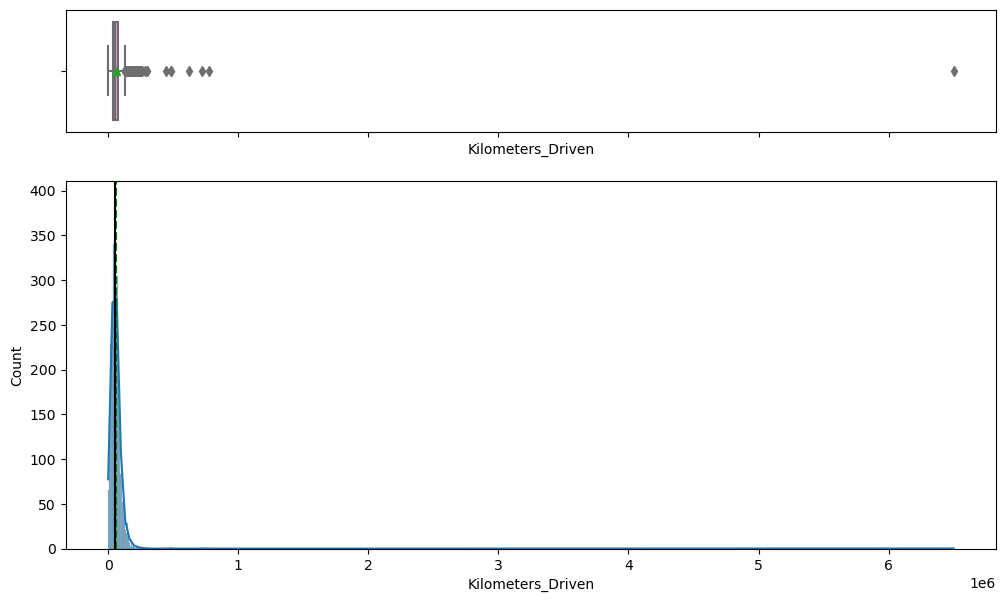

In [522]:
histogram_boxplot(df_new, 'Kilometers_Driven', kde=True) 

The distribution of Kilometers_Driven is heavily right skewed.

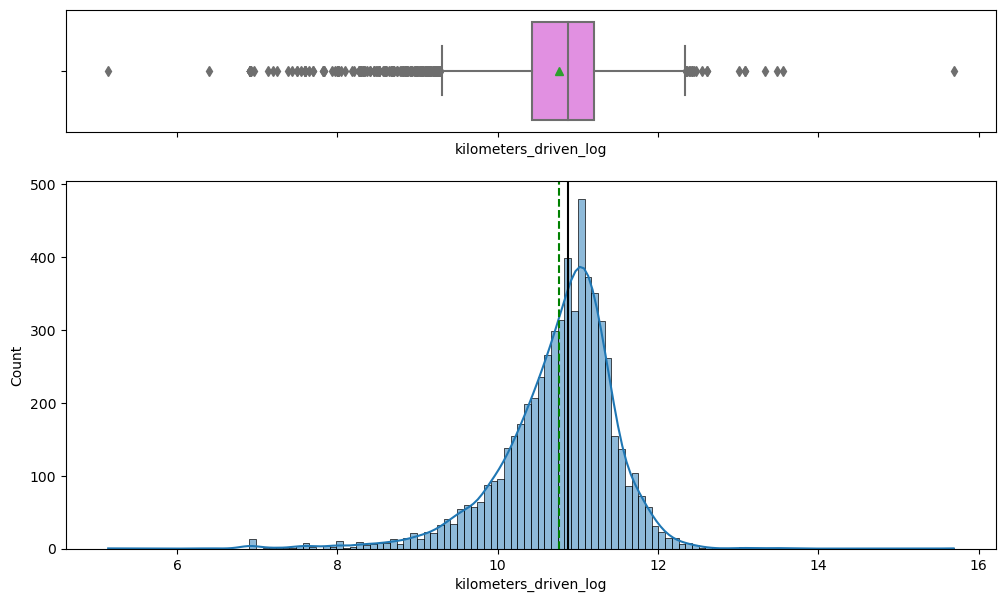

In [523]:
histogram_boxplot(df_new, 'kilometers_driven_log', kde=True)

The distribution of kilometers_driven_log looks normally distributed.

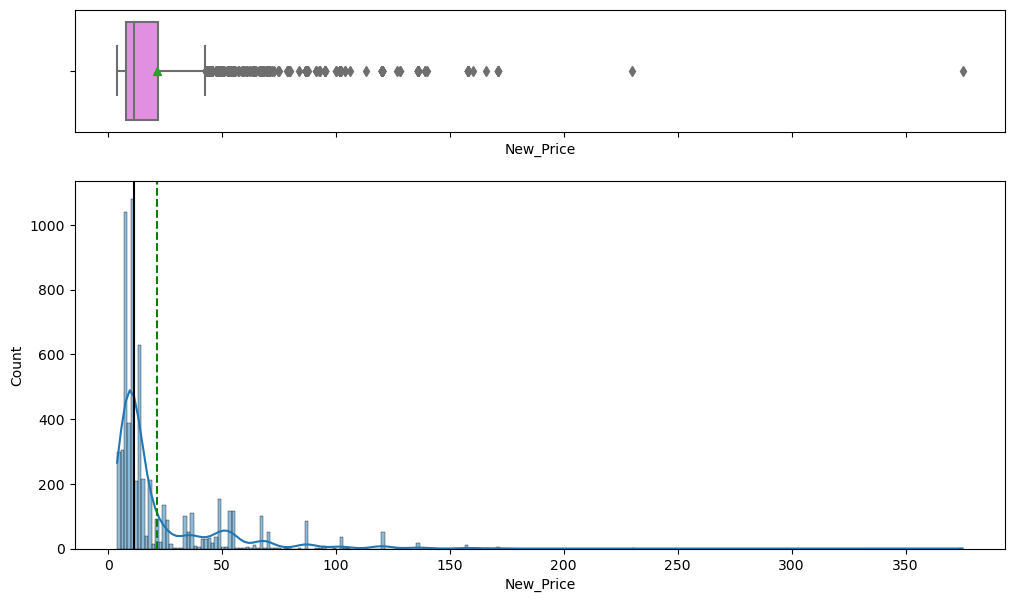

In [524]:
histogram_boxplot(df_new, 'New_Price', kde=True)

The distribution of New_Price is heavily right skewed.

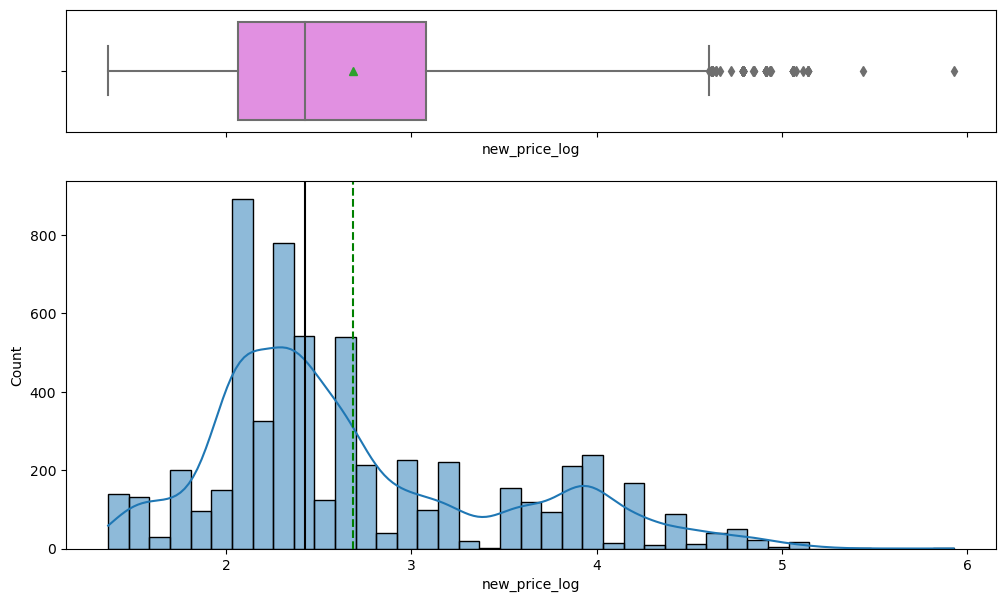

In [525]:
histogram_boxplot(df_new, 'new_price_log', kde=True)

The skewness is reduced with log transformation on new_price variable

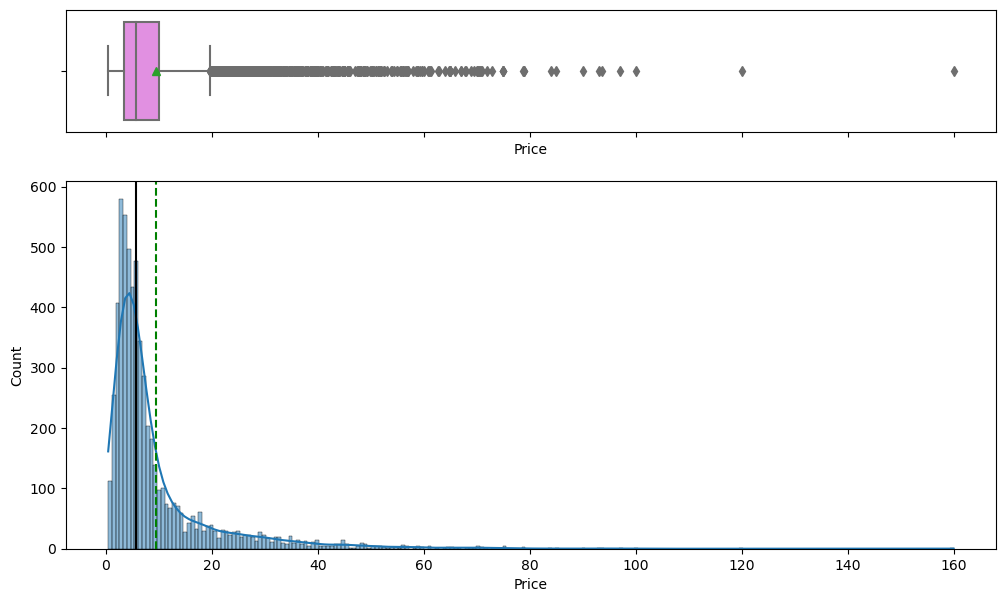

In [526]:
histogram_boxplot(df_new, 'Price', kde=True)

The distribution of Price variable is heavily right skewed.

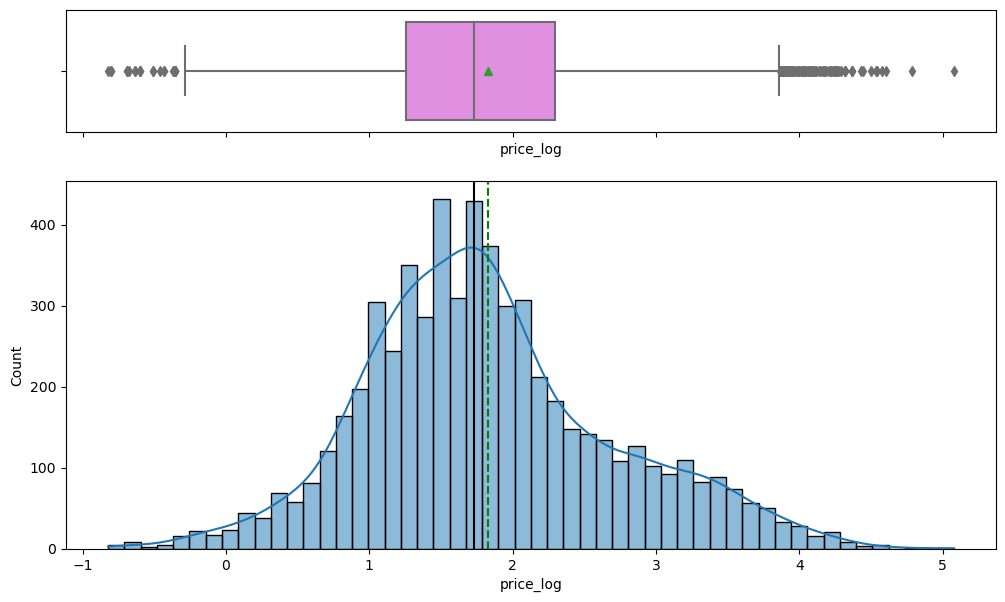

In [527]:
histogram_boxplot(df_new, 'price_log', kde=True)

The distribution of price_log variable looks normally distributed

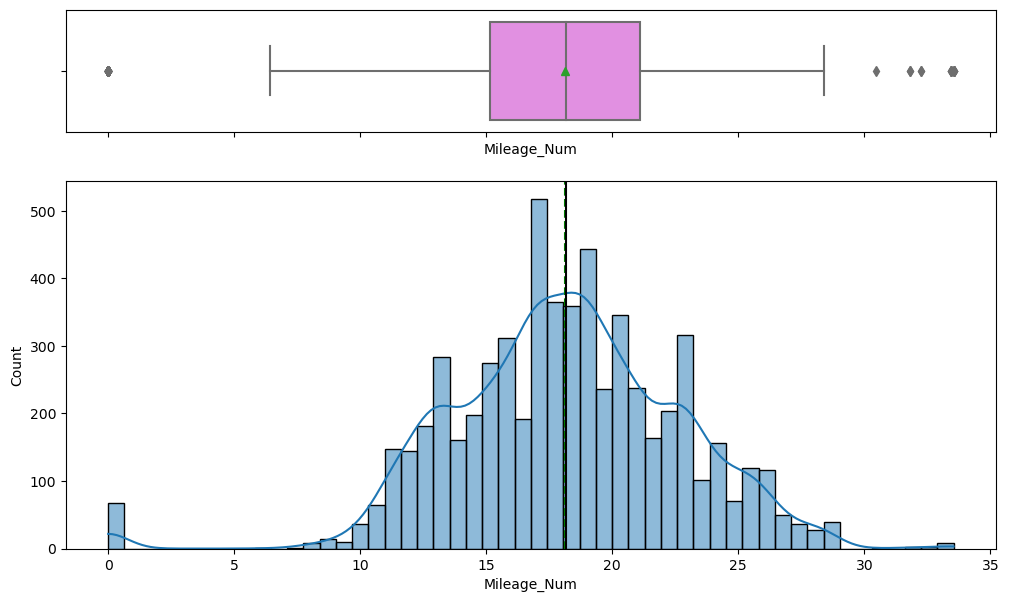

In [528]:
histogram_boxplot(df_new, 'Mileage_Num', kde=True)

There are some extreme outliers but rest of the disribution for Mileage_Num variable looks normally distributed

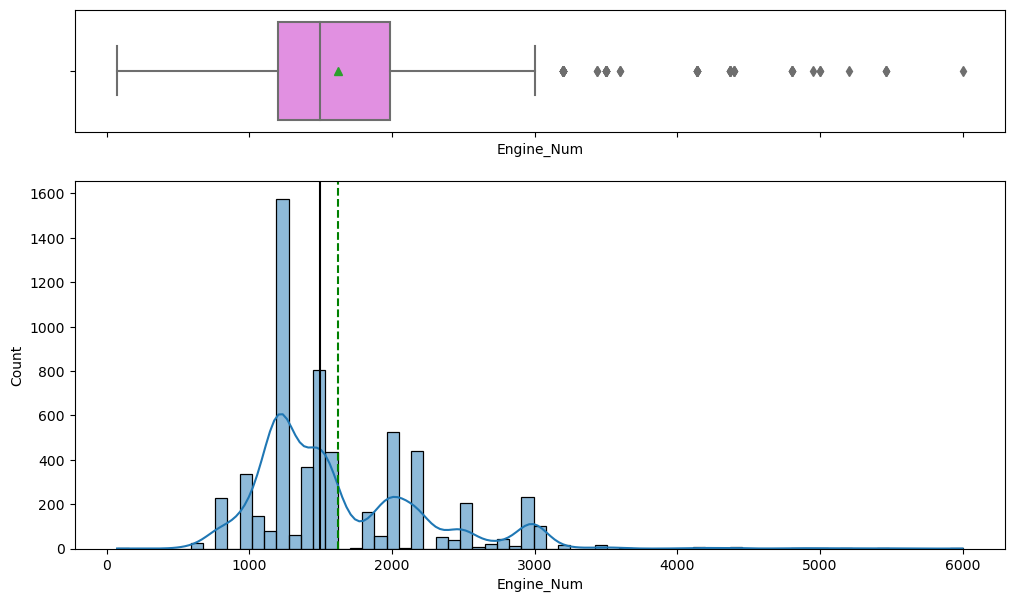

In [529]:
histogram_boxplot(df_new, 'Engine_Num', kde=True)

The distribution of Engine_Num variable is right skewed with extreme outliers on right hand side

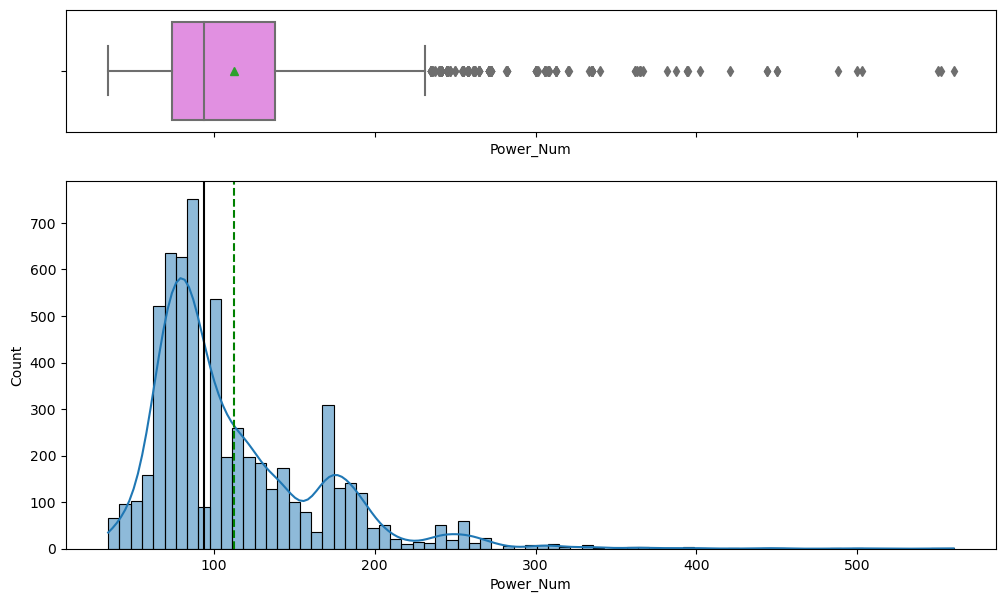

In [530]:
histogram_boxplot(df_new, 'Power_Num', kde=True)

##### Univariate Analysis on Categorical Columns

Location, Year, Fuel_Type, Transmission, Owner_Type, Seats, Brand, Model

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Year                   6019 non-null   int64  
 2   Kilometers_Driven      6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Seats                  6019 non-null   float64
 7   New_Price              6019 non-null   float64
 8   Price                  6019 non-null   float64
 9   Mileage_Num            6019 non-null   float64
 10  Mileage_Unit           6017 non-null   object 
 11  Engine_Num             6019 non-null   float64
 12  Power_Num              6019 non-null   float64
 13  Brand                  6019 non-null   object 
 14  Model                  6019 non-null   object 
 15  kilo

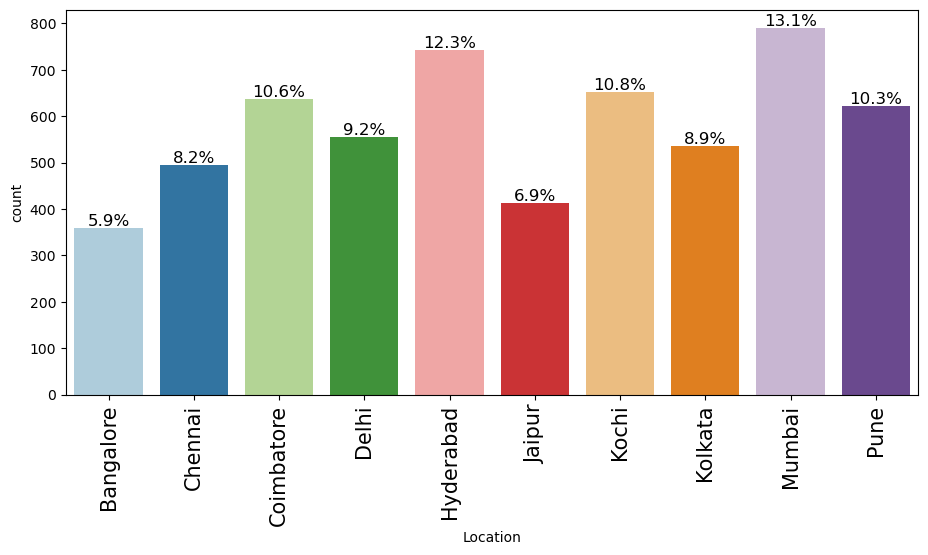

In [532]:
labeled_barplot(df_new, "Location", perc=True, n=10)

Mumbai has highest sales which is 13.1% and Banglore has least sales comparatively which is 5.9%

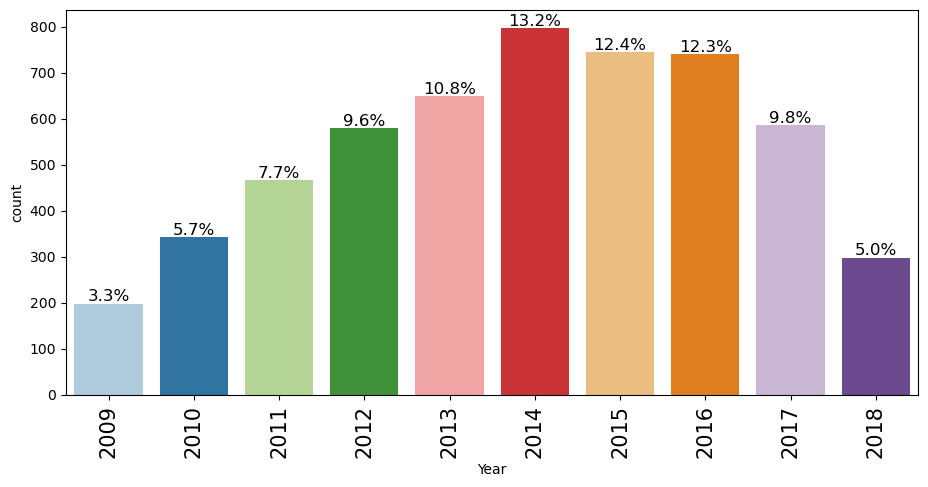

In [533]:
labeled_barplot(df_new, "Year", perc=True, n=10)

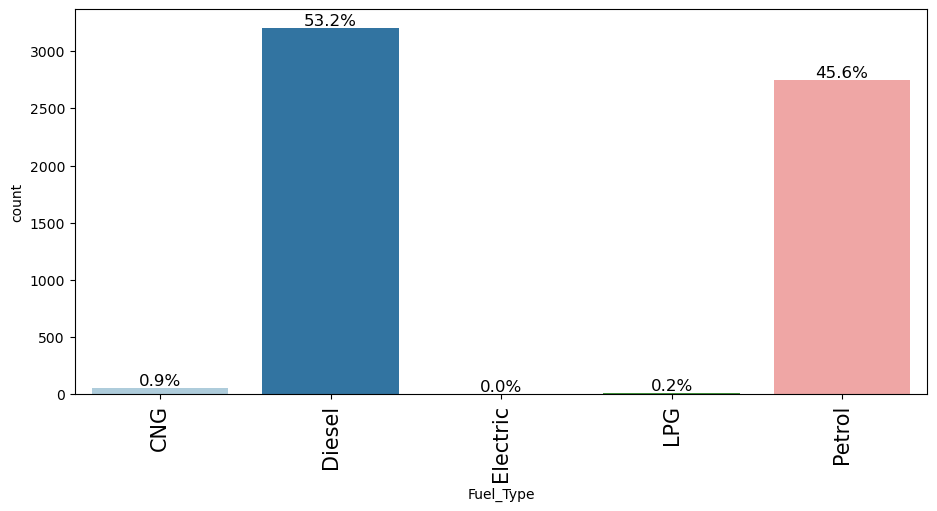

In [534]:
labeled_barplot(df_new, "Fuel_Type", perc=True, n=10)

Cars with Fuel type Diesel are most sold which is 53.2% and Petrol cars are of 45.6%

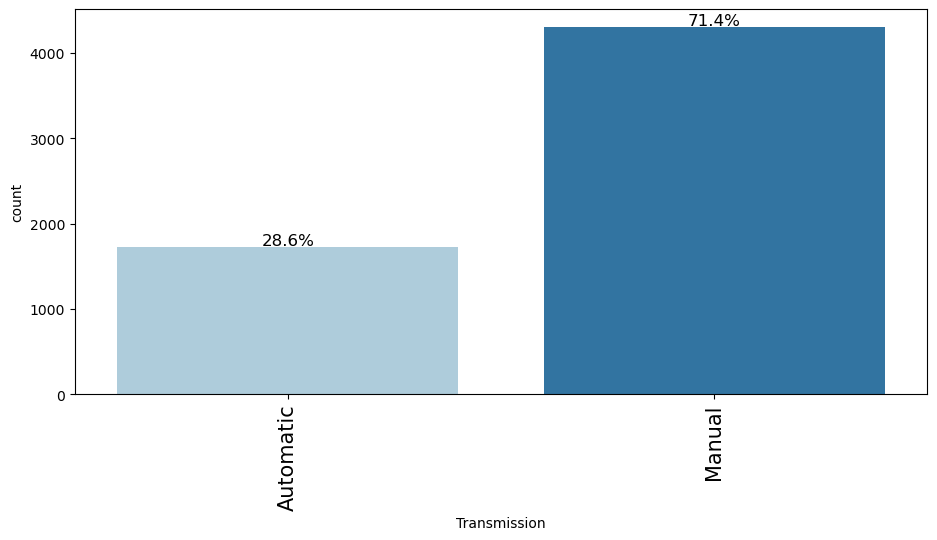

In [535]:
labeled_barplot(df_new, "Transmission", perc=True, n=10)

Manual transmission type cars are highest sold (71.4%) when compared to Automatic cars

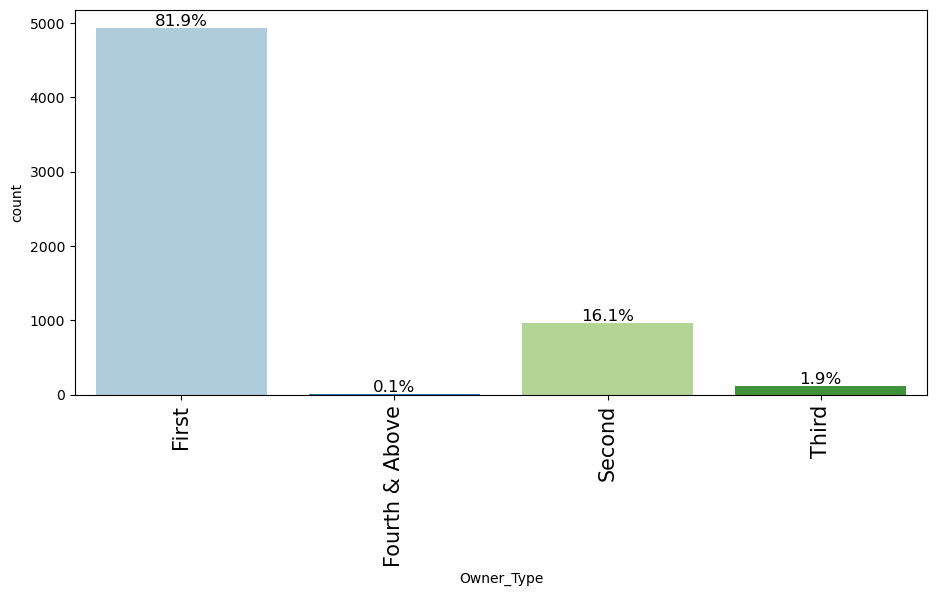

In [536]:
labeled_barplot(df_new, "Owner_Type", perc=True, n=10)

First Owner cars are highest sold which is 81.9%

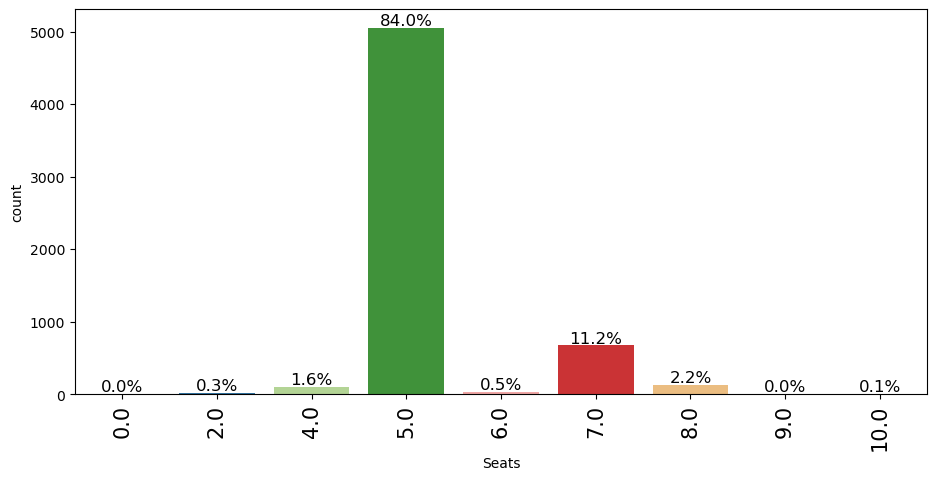

In [537]:
labeled_barplot(df_new, "Seats", perc=True, n=10)

84% of the cars which are sold have 5 seats

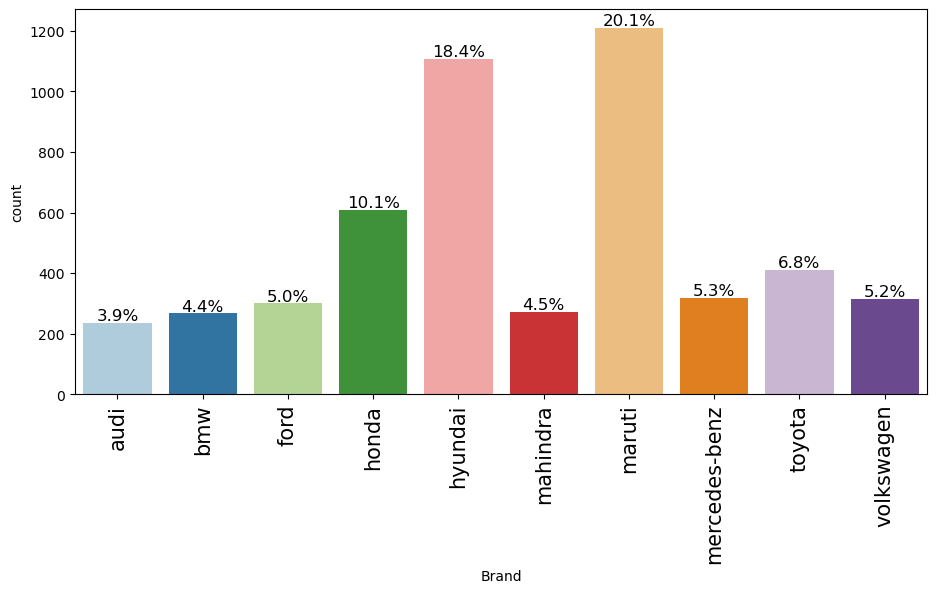

In [538]:
labeled_barplot(df_new, "Brand", perc=True, n=10)

20.1% of cars sold belong to Maruti brand

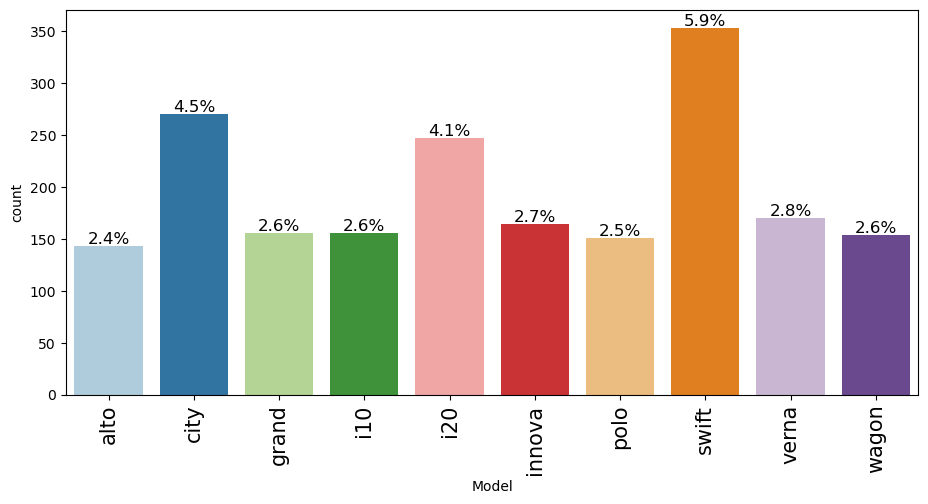

In [539]:
labeled_barplot(df_new, "Model", perc=True, n=10)

5.9% of the cars which are sold belong to Swift model

##### Multivariate Analysis

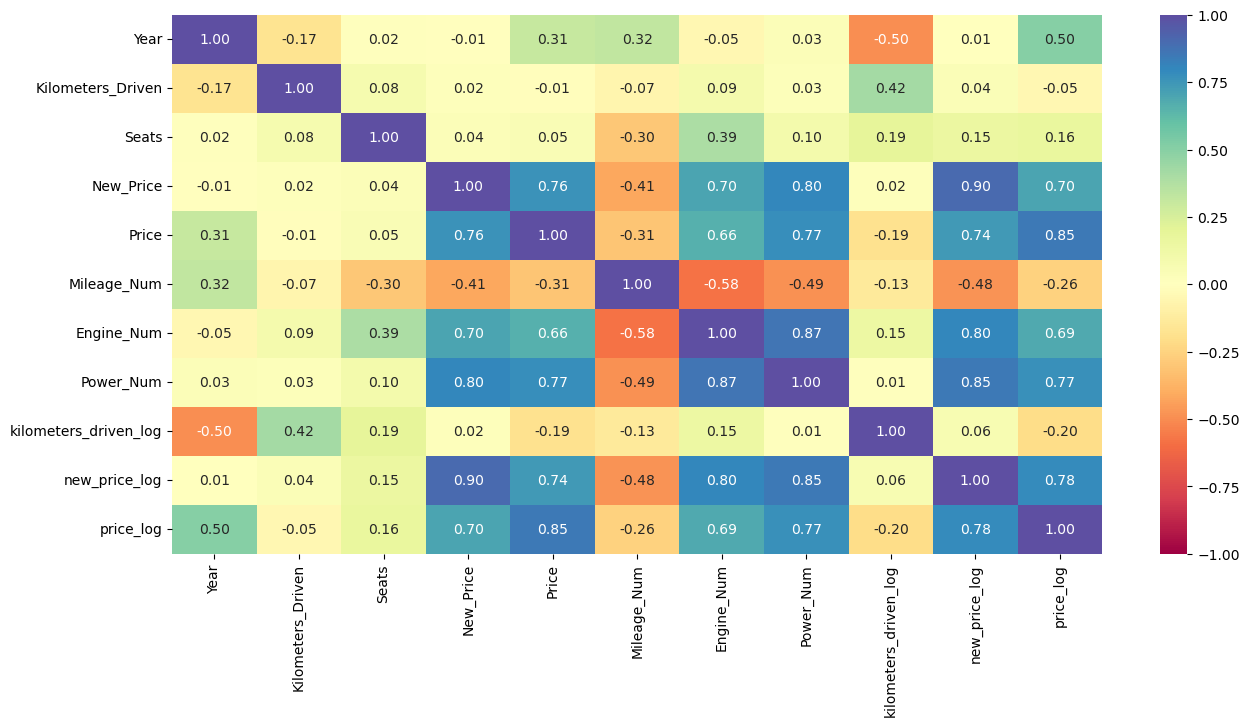

In [540]:
#multivariate analysis
plt.figure(figsize=(15, 7))
sns.heatmap(
    df_new.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Price variable has strong positive correlation with Power, New Price and Engine type. It has negative correlation with mileage. If mileage of used car increases, price decreases. 

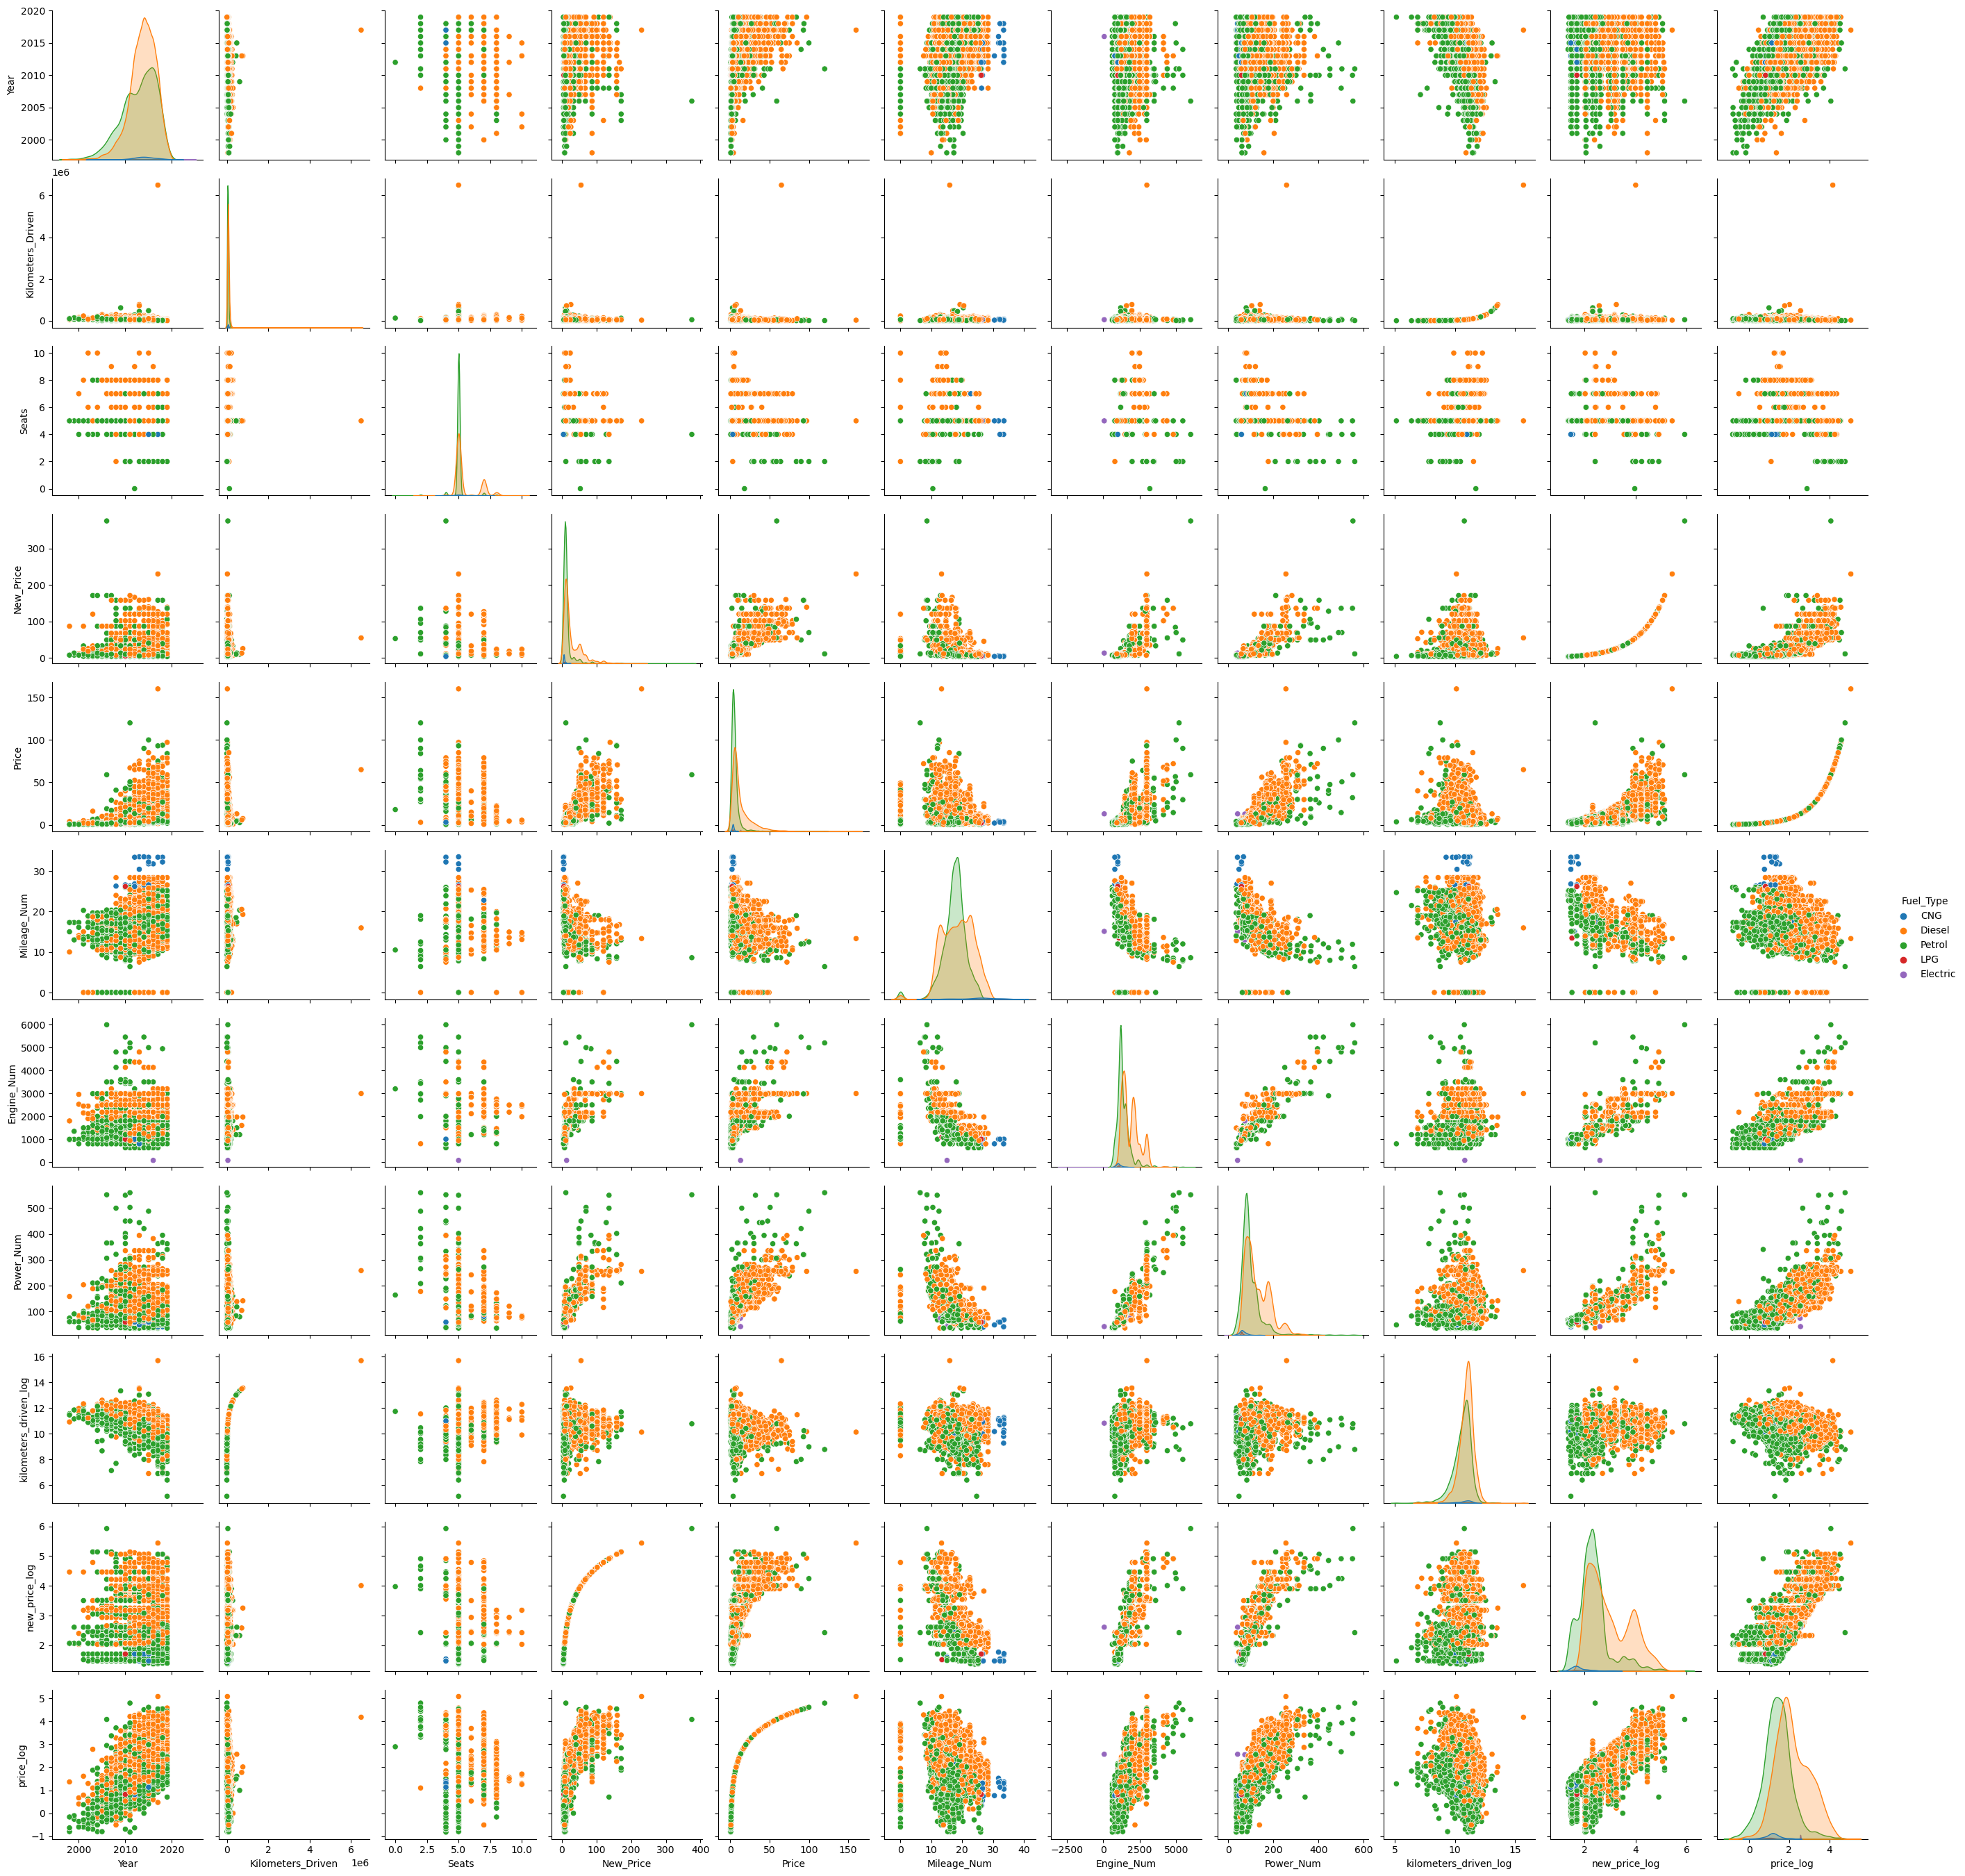

In [541]:
#pair plot 
sns.pairplot(data=df_new, hue="Fuel_Type")
plt.show()

Let us check how used car Price varies with various features like Location, Year, Fuel_Type, Transmission, Owner_Type and Brand

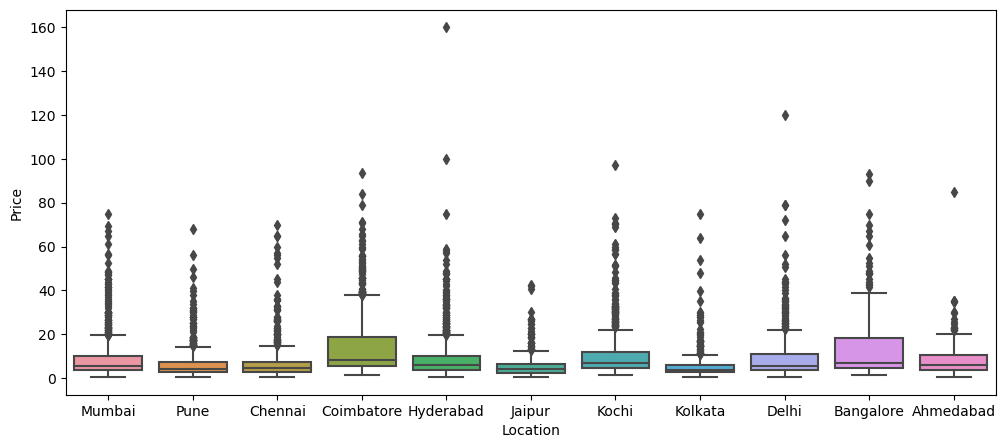

In [542]:
## boxplot for 'Location' and 'Price'
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df_new)
plt.show()

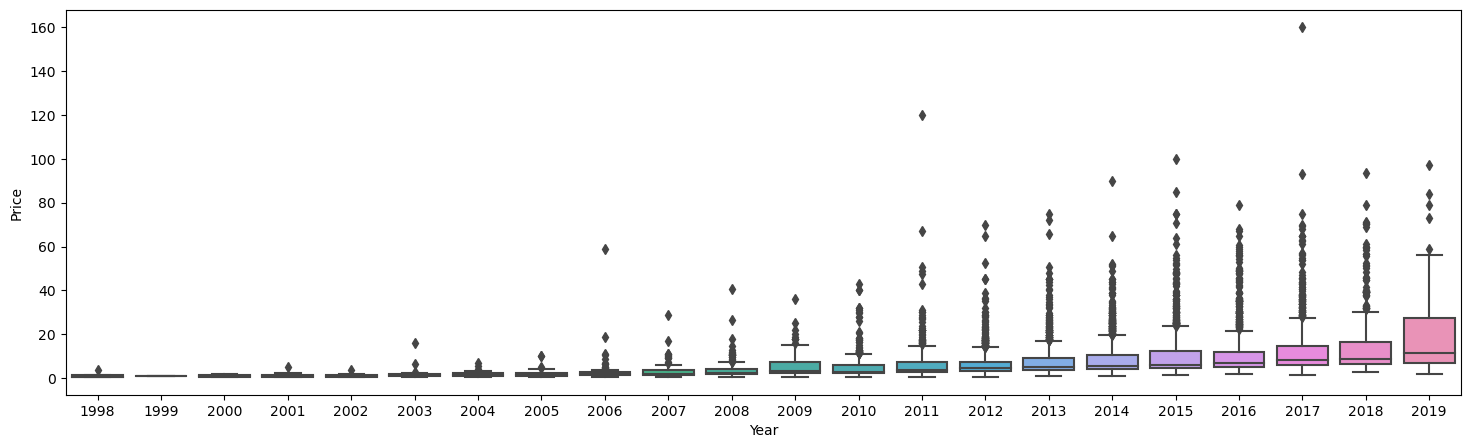

In [543]:
#boxplot for 'Year' and 'Price'
plt.figure(figsize=(18, 5))
sns.boxplot(x="Year", y="Price", data=df_new)
plt.show()

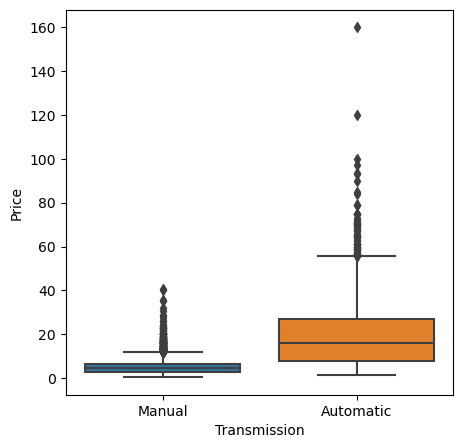

In [544]:
## boxplot for 'Transmission' and 'Price'
plt.figure(figsize=(5, 5))
sns.boxplot(x="Transmission", y="Price", data=df_new) 
plt.show()

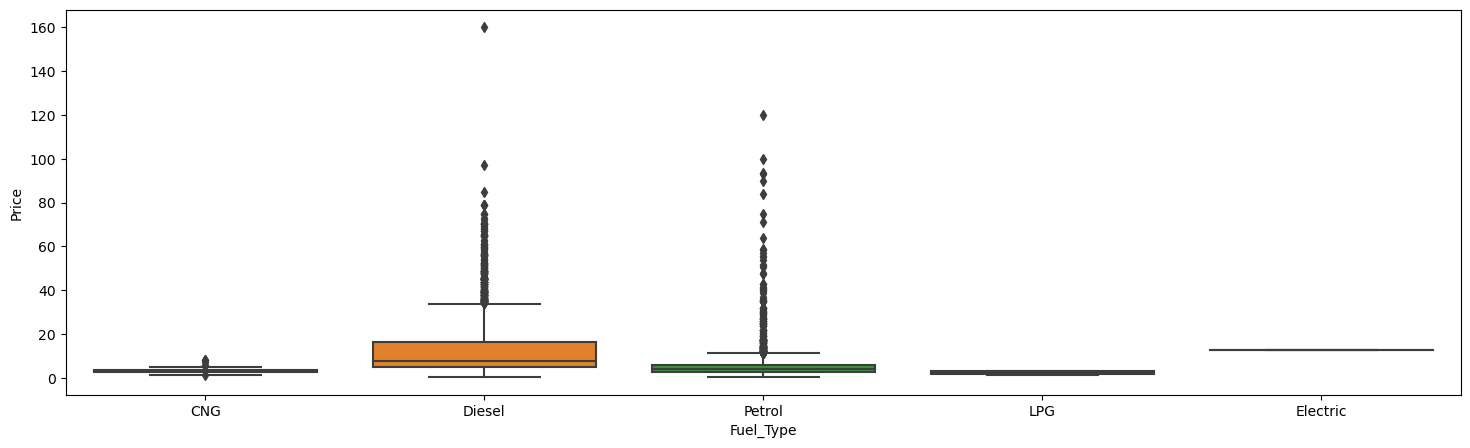

In [545]:
# boxplot for 'Fuel_Type' and 'Price'
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df_new) 
plt.show()

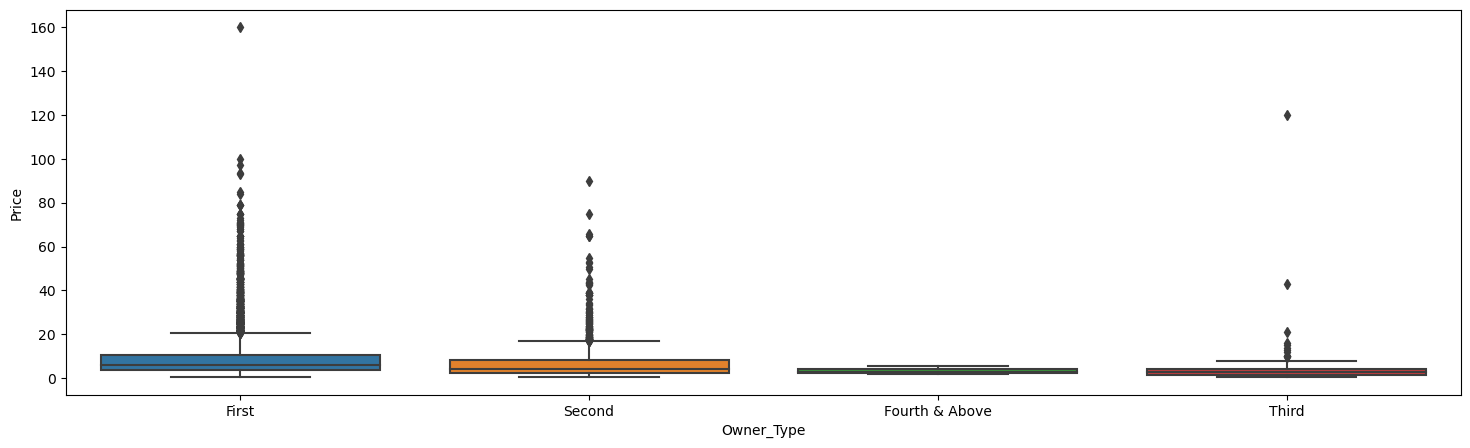

In [546]:
#boxplot for 'Owner_Type' and 'Price'
plt.figure(figsize=(18, 5))
sns.boxplot(x="Owner_Type", y="Price", data=df_new) 
plt.show()

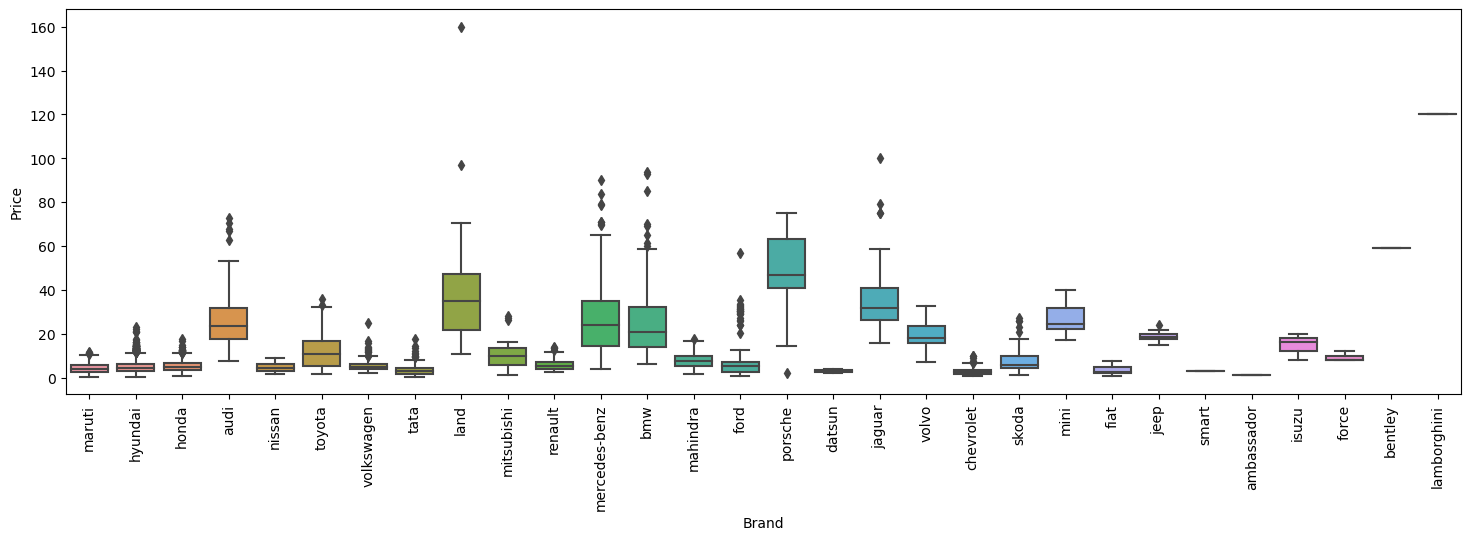

In [547]:
#boxplot for 'Brand' and 'Price'
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df_new) 
plt.xticks(rotation=90)
plt.show()

Observations from bivariate analysis to check how price varies with other features

- Price increases when manufacturing year increases,

- There are some brands which have high prices when compared to other brands; but among these Porsche has high price, land rover, jaguar, audi, mercedes-benz and bmw are some other popular brands with high prices

- Used cars with first owner type has high price and price decreases as no.of owners increase

- Diesel type cars and automatic transmission type cars have high prices

- Cars sold in Coimbatore and Banglore are of more price when compared to other locations

##### Outlier Treatment

In [548]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Year                   6019 non-null   int64  
 2   Kilometers_Driven      6019 non-null   int64  
 3   Fuel_Type              6019 non-null   object 
 4   Transmission           6019 non-null   object 
 5   Owner_Type             6019 non-null   object 
 6   Seats                  6019 non-null   float64
 7   New_Price              6019 non-null   float64
 8   Price                  6019 non-null   float64
 9   Mileage_Num            6019 non-null   float64
 10  Engine_Num             6019 non-null   float64
 11  Power_Num              6019 non-null   float64
 12  Brand                  6019 non-null   object 
 13  Model                  6019 non-null   object 
 14  kilometers_driven_log  6019 non-null   float64
 15  new_

In [549]:
df_new.sort_values(by=["Kilometers_Driven"], ascending=False).head(10) # To check top 10 values in descending order

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
2328    Chennai  2017            6500000    Diesel    Automatic      First   
340     Kolkata  2013             775000    Diesel    Automatic      First   
1860    Chennai  2013             720000    Diesel       Manual      First   
358     Chennai  2009             620000    Petrol       Manual      First   
3092    Kolkata  2015             480000    Petrol       Manual      First   
2823    Chennai  2015             480000    Diesel    Automatic      First   
4491  Bangalore  2013             445000    Petrol       Manual      First   
3649     Jaipur  2008             300000    Diesel       Manual      First   
1528  Hyderabad  2005             299322    Diesel       Manual      First   
1975       Pune  2012             282000    Petrol       Manual      First   

      Seats  New_Price  Price  Mileage_Num  Engine_Num  Power_Num       Brand  \
2328    5.0      55.07  65.00        15.97      2993.0     258.00         bmw   
340     5.0      25.83   7.50        19.30      1968.0     141.00       skoda   
1860    5.0      13.23   5.90        20.54      1598.0     103.60  volkswagen   
358     5.0      10.25   2.70        20.36      1197.0      78.90     hyundai   
3092    5.0      13.58   5.00        17.40      1497.0     117.30       honda   
2823    5.0      10.15  13.00        16.96      1968.0     138.03  volkswagen   
4491    5.0      10.25   4.45        18.50      1197.0      82.90     hyundai   
3649    5.0       7.63   1.00        17.00      1405.0      70.00        tata   
1528    8.0      24.01   4.00        12.80      2494.0     102.00      toyota   
1975    5.0      33.36   3.30        13.14      1798.0     160.00       skoda   

        Model  kilometers_driven_log  new_price_log  price_log  
2328       x5              15.687313       4.008605   4.174387  
340   octavia              13.560618       3.251537   2.014903  
1860    vento              13.487006       2.582487   1.774952  
358       i10              13.337475       2.327278   0.993252  
3092     city              13.081541       2.608598   1.609438  
2823    jetta              13.081541       2.317474   2.564949  
4491      i20              13.005830       2.327278   1.492904  
3649   indigo              12.611538       2.032088   0.000000  
1528   innova              12.609275       3.178470   1.386294  
1975   superb              12.549662       3.507358   1.193922

There is one extreme value at row 2328 with value 6500000 which looks very abnormal. We have only value and we can delete it

In [550]:
df_new.drop(2328, inplace=True)

In [551]:
df_new.reset_index(drop=True, inplace=True)

In [552]:
df_new.sort_values(by=["Kilometers_Driven"], ascending=False).head(10) # To check top 10 values in descending order

Location  Year  Kilometers_Driven Fuel_Type Transmission  \
340     Kolkata  2013             775000    Diesel    Automatic   
1860    Chennai  2013             720000    Diesel       Manual   
358     Chennai  2009             620000    Petrol       Manual   
3091    Kolkata  2015             480000    Petrol       Manual   
2822    Chennai  2015             480000    Diesel    Automatic   
4490  Bangalore  2013             445000    Petrol       Manual   
3648     Jaipur  2008             300000    Diesel       Manual   
1528  Hyderabad  2005             299322    Diesel       Manual   
1975       Pune  2012             282000    Petrol       Manual   
29       Mumbai  2007             262000    Diesel       Manual   

          Owner_Type  Seats  New_Price  Price  Mileage_Num  Engine_Num  \
340            First    5.0      25.83   7.50        19.30      1968.0   
1860           First    5.0      13.23   5.90        20.54      1598.0   
358            First    5.0      10.25   2.70        20.36      1197.0   
3091           First    5.0      13.58   5.00        17.40      1497.0   
2822           First    5.0      10.15  13.00        16.96      1968.0   
4490           First    5.0      10.25   4.45        18.50      1197.0   
3648           First    5.0       7.63   1.00        17.00      1405.0   
1528           First    8.0      24.01   4.00        12.80      2494.0   
1975           First    5.0      33.36   3.30        13.14      1798.0   
29    Fourth & Above    7.0      24.01   4.00        12.80      2494.0   

      Power_Num       Brand    Model  kilometers_driven_log  new_price_log  \
340      141.00       skoda  octavia              13.560618       3.251537   
1860     103.60  volkswagen    vento              13.487006       2.582487   
358       78.90     hyundai      i10              13.337475       2.327278   
3091     117.30       honda     city              13.081541       2.608598   
2822     138.03  volkswagen    jetta              13.081541       2.317474   
4490      82.90     hyundai      i20              13.005830       2.327278   
3648      70.00        tata   indigo              12.611538       2.032088   
1528     102.00      toyota   innova              12.609275       3.178470   
1975     160.00       skoda   superb              12.549662       3.507358   
29       102.00      toyota   innova              12.476100       3.178470   

      price_log  
340    2.014903  
1860   1.774952  
358    0.993252  
3091   1.609438  
2822   2.564949  
4490   1.492904  
3648   0.000000  
1528   1.386294  
1975   1.193922  
29     1.386294

In [553]:
df_new.sort_values(by=["Kilometers_Driven"], ascending=True).head(10) # To check top 10 values in ascending order

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
1361     Mumbai  2019                171    Petrol       Manual      First   
5605     Mumbai  2019                600    Petrol    Automatic      First   
1161  Ahmedabad  2018               1000    Petrol    Automatic      First   
1598     Jaipur  2017               1000    Diesel       Manual      First   
173     Kolkata  2019               1000    Petrol       Manual      First   
1242      Delhi  2018               1000    Diesel    Automatic      First   
2054     Mumbai  2017               1000    Petrol       Manual      First   
1198  Hyderabad  2019               1000    Petrol       Manual      First   
5338       Pune  2019               1000    Petrol       Manual      First   
5940       Pune  2018               1000    Petrol       Manual      First   

      Seats  New_Price  Price  Mileage_Num  Engine_Num  Power_Num       Brand  \
1361    5.0       4.36   3.60        24.70       796.0      47.30      maruti   
5605    5.0       6.80   6.25        21.50      1197.0      81.80      maruti   
1161    5.0       7.15   6.85        20.30      1199.0      84.00        tata   
1598    5.0       7.63   7.50        13.49      2179.0     138.03        tata   
173     5.0       7.39   6.50        18.90      1197.0      81.86     hyundai   
1242    5.0      52.77  40.00        13.60      1999.0     177.00      jaguar   
2054    5.0       7.87   6.36        20.89      1197.0      81.80      maruti   
1198    5.0       6.74   5.68        18.78       999.0      75.00  volkswagen   
5338    5.0      10.25   8.60        17.19      1197.0      81.86     hyundai   
5940    5.0       4.45   3.40        25.17       799.0      53.30     renault   

      Model  kilometers_driven_log  new_price_log  price_log  
1361   alto               5.141664       1.472472   1.280934  
5605  wagon               6.396930       1.916923   1.832581  
1161  tigor               6.907755       1.967112   1.924249  
1598  xenon               6.907755       2.032088   2.014903  
173   grand               6.907755       2.000128   1.871802  
1242     xe               6.907755       3.965943   3.688879  
2054  ignis               6.907755       2.063058   1.850028  
1198   polo               6.907755       1.908060   1.736951  
5338    i20               6.907755       2.327278   2.151762  
5940   kwid               6.907755       1.492904   1.223775

In [554]:
df_new.sort_values(by=["Seats"], ascending=False).head(10) # To check top 10 values in descending order

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
917      Mumbai  2013              20000    Diesel       Manual      First   
1907  Bangalore  2002              63000    Diesel       Manual      Third   
2574  Hyderabad  2015             120000    Diesel       Manual      First   
2267       Pune  2004             215750    Diesel       Manual     Second   
814        Pune  2004              77757    Diesel       Manual     Second   
2358    Chennai  2016             150000    Diesel       Manual      First   
2312    Kolkata  2012              67132    Diesel       Manual      First   
1347  Bangalore  2007              74112    Diesel       Manual      First   
4150    Chennai  2014              45000    Diesel       Manual      First   
2572     Mumbai  2008              70700    Diesel       Manual      First   

      Seats  New_Price  Price  Mileage_Num  Engine_Num  Power_Num      Brand  \
917    10.0      7.630   5.25        14.07      1978.0      83.10       tata   
1907   10.0     24.010   3.65        13.10      2446.0      75.00     toyota   
2574   10.0     11.300   5.50        14.80      2499.0      80.00  chevrolet   
2267   10.0     24.010   3.50         0.00      2446.0      75.00     toyota   
814    10.0     24.010   3.50        13.10      2446.0      75.00     toyota   
2358    9.0     11.670   4.50        14.95      2489.0      93.70   mahindra   
2312    9.0     11.300   4.75        13.58      2499.0      78.00  chevrolet   
1347    9.0     18.865   4.10        12.05      2179.0     120.00   mahindra   
4150    8.0     11.300   4.75        18.20      1248.0      73.74  chevrolet   
2572    8.0     24.010   4.75        12.99      2494.0     100.00     toyota   

        Model  kilometers_driven_log  new_price_log  price_log  
917      sumo               9.903488       2.032088   1.658228  
1907   qualis              11.050890       3.178470   1.294727  
2574   tavera              11.695247       2.424803   1.704748  
2267   qualis              12.281876       3.178470   1.252763  
814    qualis              11.261344       3.178470   1.252763  
2358     xylo              11.918391       2.457021   1.504077  
2312   tavera              11.114416       2.424803   1.558145  
1347  scorpio              11.213333       2.937308   1.410987  
4150    enjoy              10.714418       2.424803   1.558145  
2572   innova              11.166201       3.178470   1.558145

In [555]:
df_new.sort_values(by=["Seats"], ascending=True).head(10) # To check top 10 values in ascending order

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3998   Hyderabad  2012             125000    Petrol    Automatic      First   
798    Bangalore  2015              10000    Petrol    Automatic      First   
1288       Kochi  2014              14262    Petrol    Automatic      First   
926    Hyderabad  2010              10000    Petrol       Manual      First   
4721     Kolkata  2010              35000    Petrol    Automatic      First   
4690   Bangalore  2014               3000    Petrol    Automatic     Second   
5780       Delhi  2011               6500    Petrol    Automatic      Third   
5293       Delhi  2011              25000    Petrol    Automatic      First   
134      Kolkata  2017              13372    Petrol    Automatic      First   
693   Coimbatore  2016              22732    Petrol    Automatic      First   

      Seats  New_Price   Price  Mileage_Num  Engine_Num  Power_Num  \
3998    0.0      53.14   18.00        10.50      3197.0     163.20   
798     2.0      49.49   55.00        18.10      3498.0     306.00   
1288    2.0      53.14   27.35         9.90      1984.0     207.80   
926     2.0     136.00   40.00         9.00      3436.0     300.00   
4721    2.0      49.49   29.50         8.10      5461.0     387.30   
4690    2.0      49.49   90.00        12.00      5461.0     421.00   
5780    2.0      11.30  120.00         6.40      5204.0     560.00   
5293    2.0      55.07   30.00        10.37      2979.0     306.00   
134     2.0      95.04   54.00        19.00      2996.0     362.07   
693     2.0      49.49   55.54        18.10      3498.0     306.00   

              Brand      Model  kilometers_driven_log  new_price_log  \
3998           audi         a4              11.736069       3.972930   
798   mercedes-benz  slk-class               9.210340       3.901771   
1288           audi         tt               9.565354       3.972930   
926         porsche     cayman               9.210340       4.912655   
4721  mercedes-benz   sl-class              10.463103       3.901771   
4690  mercedes-benz  slk-class               8.006368       3.901771   
5780    lamborghini   gallardo               8.779557       2.424803   
5293            bmw         z4              10.126631       4.008605   
134   mercedes-benz        slc               9.500918       4.554298   
693   mercedes-benz  slk-class              10.031529       3.901771   

      price_log  
3998   2.890372  
798    4.007333  
1288   3.308717  
926    3.688879  
4721   3.384390  
4690   4.499810  
5780   4.787492  
5293   3.401197  
134    3.988984  
693    4.017103

In [556]:
df_new.groupby(["Brand", "Model"], as_index=False)["Seats"].median()

Brand    Model  Seats
0    ambassador  classic    5.0
1          audi       a3    5.0
2          audi       a4    5.0
3          audi       a6    5.0
4          audi       a7    5.0
..          ...      ...    ...
210       volvo      s60    5.0
211       volvo      s80    5.0
212       volvo      v40    5.0
213       volvo     xc60    5.0
214       volvo     xc90    7.0

[215 rows x 3 columns]

In [557]:
df_new.loc[3999, "Seats"] = 5.0 

In [558]:
df_new.sort_values(by=["Seats"], ascending=True).head(10)

Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
3998   Hyderabad  2012             125000    Petrol    Automatic      First   
798    Bangalore  2015              10000    Petrol    Automatic      First   
1288       Kochi  2014              14262    Petrol    Automatic      First   
926    Hyderabad  2010              10000    Petrol       Manual      First   
4721     Kolkata  2010              35000    Petrol    Automatic      First   
4690   Bangalore  2014               3000    Petrol    Automatic     Second   
5780       Delhi  2011               6500    Petrol    Automatic      Third   
5293       Delhi  2011              25000    Petrol    Automatic      First   
134      Kolkata  2017              13372    Petrol    Automatic      First   
693   Coimbatore  2016              22732    Petrol    Automatic      First   

      Seats  New_Price   Price  Mileage_Num  Engine_Num  Power_Num  \
3998    0.0      53.14   18.00        10.50      3197.0     163.20   
798     2.0      49.49   55.00        18.10      3498.0     306.00   
1288    2.0      53.14   27.35         9.90      1984.0     207.80   
926     2.0     136.00   40.00         9.00      3436.0     300.00   
4721    2.0      49.49   29.50         8.10      5461.0     387.30   
4690    2.0      49.49   90.00        12.00      5461.0     421.00   
5780    2.0      11.30  120.00         6.40      5204.0     560.00   
5293    2.0      55.07   30.00        10.37      2979.0     306.00   
134     2.0      95.04   54.00        19.00      2996.0     362.07   
693     2.0      49.49   55.54        18.10      3498.0     306.00   

              Brand      Model  kilometers_driven_log  new_price_log  \
3998           audi         a4              11.736069       3.972930   
798   mercedes-benz  slk-class               9.210340       3.901771   
1288           audi         tt               9.565354       3.972930   
926         porsche     cayman               9.210340       4.912655   
4721  mercedes-benz   sl-class              10.463103       3.901771   
4690  mercedes-benz  slk-class               8.006368       3.901771   
5780    lamborghini   gallardo               8.779557       2.424803   
5293            bmw         z4              10.126631       4.008605   
134   mercedes-benz        slc               9.500918       4.554298   
693   mercedes-benz  slk-class              10.031529       3.901771   

      price_log  
3998   2.890372  
798    4.007333  
1288   3.308717  
926    3.688879  
4721   3.384390  
4690   4.499810  
5780   4.787492  
5293   3.401197  
134    3.988984  
693    4.017103

## Model Building - Linear Regression

In [559]:
X = df_new.drop(["Price", "price_log"], axis=1)
y = df_new["Price"] # Dependent variable as price

In [560]:
# Creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

Year  Kilometers_Driven  Seats  New_Price  Mileage_Num  Engine_Num  \
0  2010              72000    5.0       5.51        26.60       998.0   
1  2015              41000    5.0      16.06        19.67      1582.0   
2  2011              46000    5.0       8.61        18.20      1199.0   
3  2012              87000    7.0      11.27        20.77      1248.0   
4  2013              40670    5.0      53.14        15.20      1968.0   

   Power_Num  kilometers_driven_log  new_price_log  Location_Bangalore  \
0      58.16              11.184421       1.706565                   0   
1     126.20              10.621327       2.776332                   0   
2      88.70              10.736397       2.152924                   0   
3      88.76              11.373663       2.422144                   0   
4     140.80              10.613246       3.972930                   0   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0                 0                    0               0                   0   
1                 0                    0               0                   0   
2                 1                    0               0                   0   
3                 1                    0               0                   0   
4                 0                    1               0                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0              0                 0                   0              0   
1              1                 1                   0              0   
2              0                 0                   0              0   
3              0                 1                   0              0   
4              0                 1                   0              0   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0                 0                    1                          0   
1                 0                    1                          0   
2                 1                    1                          0   
3                 0                    1                          0   
4                 0                    0                          0   

   Owner_Type_Second  Owner_Type_Third  Brand_audi  Brand_bentley  Brand_bmw  \
0                  0                 0           0              0          0   
1                  0                 0           0              0          0   
2                  0                 0           0              0          0   
3                  0                 0           0              0          0   
4                  1                 0           1              0          0   

   Brand_chevrolet  Brand_datsun  Brand_fiat  Brand_force  Brand_ford  \
0                0             0           0            0           0   
1                0             0           0            0           0   
2                0             0           0            0           0   
3                0             0           0            0           0   
4                0             0           0            0           0   

   Brand_honda  Brand_hyundai  Brand_isuzu  Brand_jaguar  Brand_jeep  \
0            0              0            0             0           0   
1            0              1            0             0           0   
2            1              0            0             0           0   
3            0              0            0             0           0   
4            0              0            0           

In [561]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Number of rows in train data : {x_train.shape[0]} and  Number of rows in test data : {x_test.shape[0]}")

Number of rows in train data : 4212 and  Number of rows in test data : 1806


In [562]:
#Fitting a linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [563]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

## Model 1 Performance Check

In [564]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf_train

Training Performance



RMSE     MAE  R-squared  Adj. R-squared       MAPE
0  4.012777  2.2259   0.871001        0.862303  43.042372

In [565]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf_test = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf_test

Test Performance



RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  4.968787  2.437538   0.801234        0.766879  43.737927


**Observations**

- The train and test $R^2$ are 0.89 and 0.82, indicating that the model explains 89% and 82% of the total variation in the train and test sets respectively. Also, both scores are comparable.


- MAE indicates that our current model is able to predict used car price within a mean error of 2.2 on the test set.

- MAPE of 46.6 on the test data means that we are able to predict within ~47% of the used cars price.

In [566]:
X = df_new.drop(["Price", "price_log"], axis=1)
y = df_new["price_log"] # Dependent variable as price_log

In [567]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

Year  Kilometers_Driven  Seats  New_Price  Mileage_Num  Engine_Num  \
0  2010              72000    5.0       5.51        26.60       998.0   
1  2015              41000    5.0      16.06        19.67      1582.0   
2  2011              46000    5.0       8.61        18.20      1199.0   
3  2012              87000    7.0      11.27        20.77      1248.0   
4  2013              40670    5.0      53.14        15.20      1968.0   

   Power_Num  kilometers_driven_log  new_price_log  Location_Bangalore  \
0      58.16              11.184421       1.706565                   0   
1     126.20              10.621327       2.776332                   0   
2      88.70              10.736397       2.152924                   0   
3      88.76              11.373663       2.422144                   0   
4     140.80              10.613246       3.972930                   0   

   Location_Chennai  Location_Coimbatore  Location_Delhi  Location_Hyderabad  \
0                 0                    0               0                   0   
1                 0                    0               0                   0   
2                 1                    0               0                   0   
3                 1                    0               0                   0   
4                 0                    1               0                   0   

   Location_Jaipur  Location_Kochi  Location_Kolkata  Location_Mumbai  \
0                0               0                 0                1   
1                0               0                 0                0   
2                0               0                 0                0   
3                0               0                 0                0   
4                0               0                 0                0   

   Location_Pune  Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_LPG  \
0              0                 0                   0              0   
1              1                 1                   0              0   
2              0                 0                   0              0   
3              0                 1                   0              0   
4              0                 1                   0              0   

   Fuel_Type_Petrol  Transmission_Manual  Owner_Type_Fourth & Above  \
0                 0                    1                          0   
1                 0                    1                          0   
2                 1                    1                          0   
3                 0                    1                          0   
4                 0                    0                          0   

   Owner_Type_Second  Owner_Type_Third  Brand_audi  Brand_bentley  Brand_bmw  \
0                  0                 0           0              0          0   
1                  0                 0           0              0          0   
2                  0                 0           0              0          0   
3                  0                 0           0              0          0   
4                  1                 0           1              0          0   

   Brand_chevrolet  Brand_datsun  Brand_fiat  Brand_force  Brand_ford  \
0                0             0           0            0           0   
1                0             0           0            0           0   
2                0             0           0            0           0   
3                0             0           0            0           0   
4                0             0           0            0           0   

   Brand_honda  Brand_hyundai  Brand_isuzu  Brand_jaguar  Brand_jeep  \
0            0              0            0             0           0   
1            0              1            0             0           0   
2            1              0            0             0           0   
3            0              0            0             0           0   
4            0              0            0           

In [568]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Number of rows in train data : {x_train.shape[0]} and  Number of rows in test data : {x_test.shape[0]}")

Number of rows in train data : 4212 and  Number of rows in test data : 1806


In [569]:
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train, y_train)

LinearRegression()

## Model 2 Performance Check

In [570]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf_train1 = model_performance_regression(lin_reg_model2, x_train, y_train)
lin_reg_model_train_perf_train1

Training Performance



RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.175812  0.123124   0.959264        0.956517   inf

In [571]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf_test1 = model_performance_regression(lin_reg_model2, x_test, y_test)
lin_reg_model_test_perf_test1

Test Performance



RMSE       MAE  R-squared  Adj. R-squared  MAPE
0  0.180312  0.128372   0.957904        0.950628   inf

## Model 1 and Model 2 Performance Comparison

In [572]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf_train.T, lin_reg_model_train_perf_train1.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Linear Regression (Price)  Linear Regression (price_log)
RMSE                             4.012777                       0.175812
MAE                              2.225900                       0.123124
R-squared                        0.871001                       0.959264
Adj. R-squared                   0.862303                       0.956517
MAPE                            43.042372                            inf

In [573]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf_test.T, lin_reg_model_test_perf_test1.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Linear Regression (Price)  Linear Regression (price_log)
RMSE                             4.968787                       0.180312
MAE                              2.437538                       0.128372
R-squared                        0.801234                       0.957904
Adj. R-squared                   0.766879                       0.950628
MAPE                            43.737927                            inf

**Observations**

Model 1 with dependent variable 'price' seems to be overfitting with differences in the performance metrics. 

Let's look at metrics for model 2 with dependent variable 'price_log'. MAPE for price_log is inf which is result of values which are 0 and let us not consider this metric 

- The train and test $R^2$ for price_log is 0.96 and 0.96, indicating that the model explains 96% and 96% of the total variation in the train and test sets respectively. Also, both scores are almost equal.

- RMSE values on the train and test sets are 0.17 and 0.18 which are comparable.

- This shows that the model is not overfitting.

- Adjusted R-squared is 96% for model1 and 95% for model2

- MAE indicates that our current model is able to predict used car prices within a mean error of 0.12 on the test set.


## Conclusion

- We have been able to build a predictive model that can be used by Cars4U to predict the price of used car with an $R^2$ of 0.95 on the training set.


- Cars4U can use this model to predict the price of used cars within a mean error of 0.13 on the test set.


- We improved our linear regression model performance by applying log transformations.
